# Business problem:
Predict the burned area of forest fires using Neural Networks

In [1]:
# Importing necessary libraries
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv", delimiter=",")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

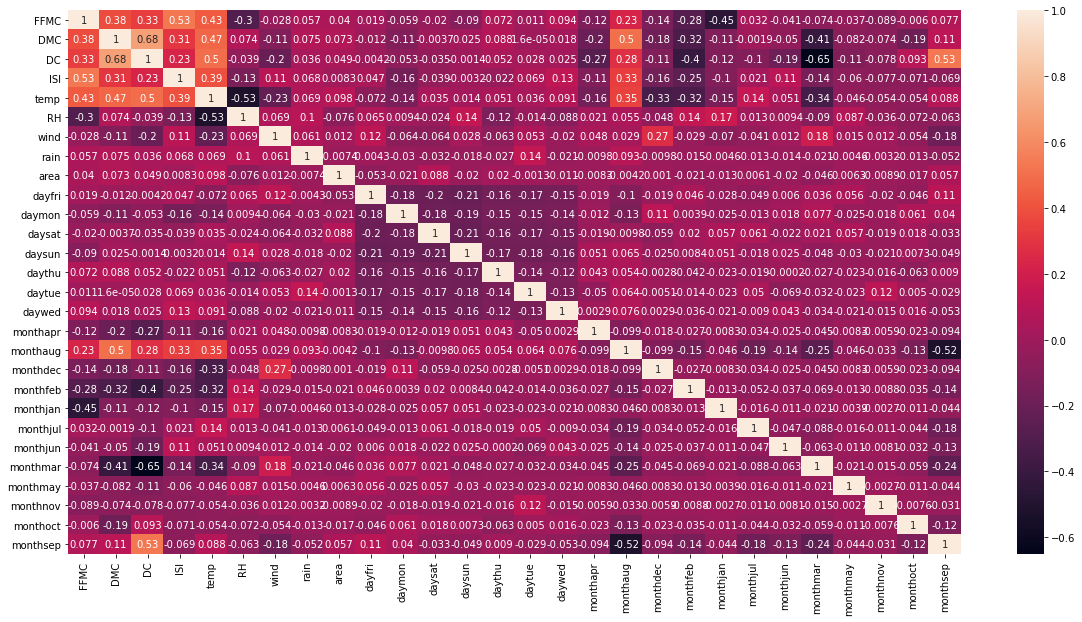

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [7]:
data.shape

(517, 31)

In [8]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df=data.copy()

In [10]:
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [11]:
df=df.drop(columns=['month','day'], axis=1)


In [12]:
df.head(2)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [13]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [14]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
df.area.value_counts()

0.00     247
1.94       3
28.66      2
0.52       2
9.96       2
        ... 
2.21       1
7.36       1
0.24       1
6.84       1
35.88      1
Name: area, Length: 251, dtype: int64

In [16]:
df.rain.value_counts()


0.0    509
0.8      2
0.2      2
0.4      1
1.4      1
6.4      1
1.0      1
Name: rain, dtype: int64

In [17]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category']= label_encoder.fit_transform(df['size_category'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [19]:
X = df.drop('size_category', axis=1)
y = df['size_category']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [21]:
# create model
model = Sequential()
model.add(Dense(42, input_shape=(28,), activation = 'relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the model
history=model.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 1s 8ms/step - loss: 6.3559 - accuracy: 0.6413 - val_loss: 1.1077 - val_accuracy: 0.5474
Epoch 2/180
28/28 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.6812 - val_loss: 0.6208 - val_accuracy: 0.7080
Epoch 3/180
28/28 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.7464 - val_loss: 0.7541 - val_accuracy: 0.7737
Epoch 4/180
28/28 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8043 - val_loss: 0.4824 - val_accuracy: 0.8102
Epoch 5/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.8188 - val_loss: 0.5324 - val_accuracy: 0.8175
Epoch 6/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.8116 - val_loss: 0.5921 - val_accuracy: 0.8175
Epoch 7/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.8080 - val_loss: 0.3867 - val_accuracy: 0.8467
Epoch 8/180
2

Epoch 59/180
28/28 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9529 - val_loss: 0.6617 - val_accuracy: 0.8905
Epoch 60/180
28/28 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9565 - val_loss: 0.2302 - val_accuracy: 0.9489
Epoch 61/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9746 - val_loss: 0.2290 - val_accuracy: 0.9489
Epoch 62/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 0.2204 - val_accuracy: 0.9562
Epoch 63/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9783 - val_loss: 0.2493 - val_accuracy: 0.9489
Epoch 64/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9746 - val_loss: 0.2325 - val_accuracy: 0.9489
Epoch 65/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.2477 - val_accuracy: 0.9489
Epoch 

28/28 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9783 - val_loss: 0.3183 - val_accuracy: 0.9489
Epoch 174/180
28/28 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9710 - val_loss: 0.3865 - val_accuracy: 0.9343
Epoch 175/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9710 - val_loss: 0.3540 - val_accuracy: 0.9562
Epoch 176/180
28/28 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9638 - val_loss: 0.2909 - val_accuracy: 0.9562
Epoch 177/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.2651 - val_accuracy: 0.9708
Epoch 178/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9819 - val_loss: 0.3243 - val_accuracy: 0.9489
Epoch 179/180
28/28 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9746 - val_loss: 0.3343 - val_accuracy: 0.9562
Epoch 180/180

In [24]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 834us/step - loss: 0.1095 - accuracy: 0.9831
accuracy: 98.31%


In [25]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 0s/step - loss: 0.2594 - accuracy: 0.9712
accuracy: 97.12%


In [26]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
model.compile(loss="categorical_crossentropy",
              optimizer='rmsprop', metrics=["accuracy"])


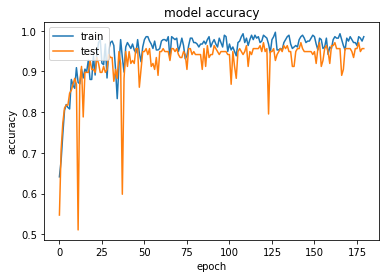

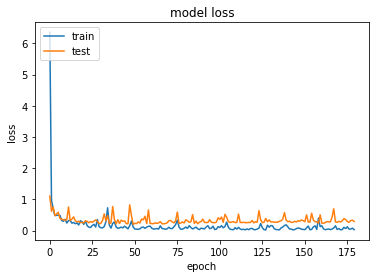

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion:

We have predicted the result with 98% accuracy here epoch=180



# Hyper parameter tuning

In [29]:
X1 = df.drop('size_category', axis=1)
y1 = df['size_category']

In [33]:
# Standardization
a = StandardScaler()
a.fit(X1)
X_standardized = a.transform(X1)

NameError: name 'StandardScaler' is not defined

In [31]:
!pip install StandardScaler

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2613 sha256=59cada4f34afd24d72b15864a34822d10ba24d3a168a3e1e91b7897cb0acbf14
  Stored in directory: c:\users\varalakshmi\appdata\local\pip\cache\wheels\5b\62\60\3d9bd6bdba43a7fd41a1c68e4122c38904371ec0763fd43128
Successfully built StandardScaler


In [36]:
# Standardization
a = StandardScaler()
a.fit(X1)
X_standardized = a.transform(X1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [38]:
#### Tuning of Hyperparameters :- Batch Size and Epochs

In [70]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam 

In [71]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [72]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

<ipython-input-72-8a1bb5609764>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ..................batch_size=10, epochs=50; total time=   2.0s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ..................batch_size=10, epochs=50; total time=   2.0s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ..................batch_size=10, epochs=50; total time=   2.0s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ..................batch_size=10, epochs=50; total time=   2.0s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ..................batch_size=10, epochs=50; total time=   2.0s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .................batch_size=10, epochs=100; total time=   3.3s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .................batch_size=10, epochs=100; total time=   3.3s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .................batch_size=10, epochs=100; total time=   3.3s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .................batch_size=10, epochs=100; total time=   3.3s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .................batch_size=10, epochs=100; total time=   3.2s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ..................batch_size=20, epochs=10; total time=   0.5s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ..................batch_size=20, epochs=10; total time=   0.5s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ..................batch_size=20, epochs=10; total time=   0.5s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ..................batch_size=20, epochs=10; total time=   0.5s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ..................batch_size=20, epochs=10; total time=   0.5s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ..................batch_size=20, epochs=50; total time=   1.2s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ..................batch_size=20, epochs=50; total time=   1.3s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ..................batch_size=20, epochs=50; total time=   1.2s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ..................batch_size=20, epochs=50; total time=   1.3s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ..................batch_size=20, epochs=50; total time=   1.1s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .................batch_size=20, epochs=100; total time=   2.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .................batch_size=20, epochs=100; total time=   2.0s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .................batch_size=20, epochs=100; total time=   1.8s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .................batch_size=20, epochs=100; total time=   2.0s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .................batch_size=20, epochs=100; total time=   1.9s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.4s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.4s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.4s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.4s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.8s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.8s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.8s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.8s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.3s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.3s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.3s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.3s


In [73]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.9187453389167786, using {'batch_size': 10, 'epochs': 50}
0.8353622198104859,0.06866517242179428 with: {'batch_size': 10, 'epochs': 10}
0.9187453389167786,0.048907462804176974 with: {'batch_size': 10, 'epochs': 50}
0.9089805722236634,0.04601419738722574 with: {'batch_size': 10, 'epochs': 100}
0.8296676635742187,0.05446160190703857 with: {'batch_size': 20, 'epochs': 10}
0.8896191120147705,0.04612933387511858 with: {'batch_size': 20, 'epochs': 50}
0.8837752223014832,0.05787696865754895 with: {'batch_size': 20, 'epochs': 100}
0.7636855840682983,0.09706474969033783 with: {'batch_size': 40, 'epochs': 10}
0.8780433297157287,0.058753622547923635 with: {'batch_size': 40, 'epochs': 50}
0.9032300233840942,0.04880423145571277 with: {'batch_size': 40, 'epochs': 100}


In [74]:
#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [75]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

<ipython-input-75-abc2c594e5d5>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.6s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.5s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.5s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.5s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.5s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.6s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.5s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.6s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.5s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.6s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.6s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.6s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.6s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.5s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.1s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.6s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.7s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.5s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.6s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.5s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.5s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.6s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.7s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.7s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.5s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.5s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.9s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.5s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.5s


In [76]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8140776753425598, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8140776753425598,0.08544651002697912 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8025205373764038,0.06725130361508913 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7383495211601258,0.14949609017211987 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7966392874717713,0.10332205278984567 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7733196377754211,0.14992881442762168 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7674943923950195,0.12617596903369158 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [77]:
#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [78]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-78-8bf52302c8c2>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.5s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.5s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.5s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.6s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.5s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.5s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.5s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.5s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.0s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.5s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.5s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.4s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.5s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.4s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.4s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.5s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.4s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.5s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.5s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.9s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.6s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.6s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.7s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.5s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.5s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.5s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   0.6s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=   0.5s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   0.7s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   0.6s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   0.6s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   0.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   0.6s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   0.6s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   0.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   0.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.1s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.6s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.6s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.6s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.8s


In [79]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7539208173751831, using {'activation_function': 'linear', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6490291297435761,0.23405711374304639 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7325242638587952,0.15400213076804797 with: {'activation_function': 'relu', 'init': 'uniform'}
0.734466016292572,0.15140339696325283 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7423076868057251,0.12167227141141614 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7383868455886841,0.13671819340325703 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.748114264011383,0.11949044774567007 with: {'activatio

In [80]:
#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [81]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-81-3f74ef20bad2>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.6s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.6s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.5s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.5s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.5s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.5s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.5s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.5s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.9s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.5s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.5s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.4s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.5s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.5s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.5s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.5s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.5s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.5s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   0.5s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.2s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.6s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.6s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.6s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.5s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.4s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.5s


In [82]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7519604206085205, using {'neuron1': 4, 'neuron2': 8}
0.7480582475662232,0.13661750505310216 with: {'neuron1': 4, 'neuron2': 2}
0.7441747546195984,0.1393093904816206 with: {'neuron1': 4, 'neuron2': 4}
0.7519604206085205,0.12669975996756128 with: {'neuron1': 4, 'neuron2': 8}
0.740328598022461,0.13426185240526287 with: {'neuron1': 8, 'neuron2': 2}
0.7500746726989747,0.11073275418235101 with: {'neuron1': 8, 'neuron2': 4}
0.7422890186309814,0.12272316507331096 with: {'neuron1': 8, 'neuron2': 8}
0.75005601644516,0.11683313271547337 with: {'neuron1': 16, 'neuron2': 2}
0.7462285399436951,0.1039585708021124 with: {'neuron1': 16, 'neuron2': 4}
0.7500933527946472,0.10677378609028061 with: {'neuron1': 16, 'neuron2': 8}


In [83]:
#### Training model with optimum values of Hyperparameters

In [84]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,y1)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y1,y_predict))

<ipython-input-84-0500381b7ebd>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.7775628626692457


In [85]:
# Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

<ipython-input-86-0620f9c60ee8>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.2s
[CV 3/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 4/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 5/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.6s
[CV 5/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.8s
[CV 2/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.9s
[CV 5/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.8s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.9s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.3s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.9s
[CV 5/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.9s
[CV 1/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 2/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.0s
[CV 3/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 4/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 5/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.0s
[CV 1/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.1s
[CV 3/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 4/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 5/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 1/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 2/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.0s
[CV 3/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 4/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 5/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 1/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 4/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.0s
[CV 5/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.7s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.2s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.1s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 5/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 2/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 3/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.0s
[CV 4/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 5/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.0s
[CV 1/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 4/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 1/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.8s
[CV 2/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 3/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.8s
[CV 5/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.2s
[CV 2/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 3/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 4/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 1/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.9s
[CV 3/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.1s
[CV 5/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.0s
[CV 1/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 4/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 5/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 1/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 3/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.9s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 5/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 3/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.1s
[CV 1/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.6s
[CV 1/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 3/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.6s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.1s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.8s
[CV 2/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.8s
[CV 3/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 2/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.6s
[CV 1/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.6s
[CV 3/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.1s
[CV 5/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.4s
[CV 1/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.8s
[CV 5/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.8s
[CV 1/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.1s
[CV 3/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 4/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 1/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 2/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 3/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 5/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.1s
[CV 4/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.6s
[CV 4/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.8s
[CV 4/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.8s
[CV 3/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.2s
[CV 5/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.6s
[CV 2/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.8s
[CV 4/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.2s
[CV 2/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.6s
[CV 4/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.6s
[CV 5/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.1s
[CV 5/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.8s
[CV 3/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.1s
[CV 1/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 2/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 3/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.6s
[CV 1/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.1s
[CV 3/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 3/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 4/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 4/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 5/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 1/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.8s
[CV 4/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.8s
[CV 5/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 2/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 3/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 1/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.3s
[CV 2/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 4/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 2/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 3/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 4/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 5/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 3/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 4/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 5/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 1/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.8s
[CV 4/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.5s
[CV 5/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.2s
[CV 3/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 5/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.9s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 5/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 5/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.3s
[CV 1/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 2/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 5/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 2/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 5/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 1/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 2/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 3/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 4/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.6s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 4/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 5/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 1/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.4s
[CV 2/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.3s
[CV 3/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.3s
[CV 4/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 5/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.6s
[CV 1/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.7s
[CV 2/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.5s
[CV 3/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.9s
[CV 2/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 4/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.8s
[CV 1/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.5s
[CV 2/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.3s
[CV 3/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.1s
[CV 4/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.9s
[CV 5/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 1/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.9s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.3s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.0s
[CV 4/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.1s
[CV 5/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.6s
[CV 1/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 2/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 4/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.4s
[CV 1/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 2/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.8s
[CV 3/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 1/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 4/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.3s
[CV 5/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 2/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 4/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.7s
[CV 5/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 4/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.3s
[CV 5/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.4s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.3s
[CV 5/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 2/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.5s
[CV 3/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 4/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 5/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.2s
[CV 5/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.2s
[CV 1/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.7s
[CV 3/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 4/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 5/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 1/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.3s
[CV 2/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.3s
[CV 3/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.2s
[CV 4/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.2s
[CV 5/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.8s
[CV 2/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 3/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 4/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.8s
[CV 5/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.3s
[CV 4/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 5/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 3/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.3s
[CV 4/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 5/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 5/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 1/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.4s
[CV 2/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.2s
[CV 5/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.6s
[CV 2/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.3s
[CV 4/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 2/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 5/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.4s
[CV 1/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.3s
[CV 2/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.5s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.2s
[CV 2/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.5s
[CV 4/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.5s
[CV 5/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 4/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.4s
[CV 2/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.8s
[CV 4/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.1s
[CV 5/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 1/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.1s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.2s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 1/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.4s
[CV 1/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.4s
[CV 2/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.5s
[CV 3/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.2s
[CV 4/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.7s
[CV 1/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.8s
[CV 2/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.6s
[CV 3/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.1s
[CV 4/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.7s
[CV 5/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.6s
[CV 1/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.6s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.6s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 4/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 5/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 4/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 5/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.4s
[CV 2/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.5s
[CV 4/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 1/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.9s
[CV 3/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.5s
[CV 5/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.5s
[CV 1/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.3s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.8s
[CV 5/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 1/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 1/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.9s
[CV 4/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.9s
[CV 3/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.2s
[CV 4/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.5s
[CV 2/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.9s
[CV 3/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.9s
[CV 5/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 1/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 5/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.9s
[CV 2/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 3/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.9s
[CV 1/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 2/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 1/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.8s
[CV 1/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 3/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 4/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.5s
[CV 2/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 3/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.9s
[CV 1/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.9s
[CV 1/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.4s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 2/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 1/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.5s
[CV 2/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.2s
[CV 3/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.3s
[CV 4/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.4s
[CV 5/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.5s
[CV 1/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 2/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 3/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 4/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 5/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 1/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 2/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 3/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.5s
[CV 4/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 5/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 2/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.5s
[CV 3/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 4/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 5/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.3s
[CV 1/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.2s
[CV 1/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.2s
[CV 2/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.4s
[CV 3/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.3s
[CV 4/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.2s
[CV 5/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 1/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.5s
[CV 2/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.6s
[CV 4/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 5/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.6s
[CV 1/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.7s
[CV 2/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.7s
[CV 3/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 4/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.4s
[CV 5/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 1/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 2/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 3/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 4/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 5/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 1/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.3s
[CV 2/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 3/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.9s
[CV 4/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.4s
[CV 5/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.7s
[CV 1/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 2/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.3s
[CV 3/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.5s
[CV 4/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.4s
[CV 5/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.6s
[CV 2/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.5s
[CV 3/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.5s
[CV 4/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.6s
[CV 5/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.6s
[CV 1/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.4s
[CV 3/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.4s
[CV 4/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 5/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.3s
[CV 1/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.5s
[CV 2/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 3/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 4/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.4s
[CV 2/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.4s
[CV 5/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.5s
[CV 1/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.4s
[CV 2/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 3/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 4/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.5s
[CV 5/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.5s
[CV 1/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.7s
[CV 2/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 3/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.5s
[CV 4/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.3s
[CV 5/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.4s
[CV 1/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.6s
[CV 3/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 4/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 5/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 2/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 4/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 1/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.2s
[CV 2/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 3/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 4/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 5/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.6s
[CV 2/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.7s
[CV 3/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.7s
[CV 5/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.7s
[CV 1/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 4/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.5s
[CV 5/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.3s
[CV 1/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 3/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.6s
[CV 4/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 5/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.1s
[CV 2/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.4s
[CV 4/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 5/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.4s
[CV 1/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 2/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.4s
[CV 3/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.6s
[CV 4/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.6s
[CV 1/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.0s
[CV 2/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.4s
[CV 3/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.7s
[CV 5/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.7s
[CV 3/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.3s
[CV 4/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.7s
[CV 5/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.7s
[CV 1/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 3/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.0s
[CV 4/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.3s
[CV 1/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.5s
[CV 2/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 3/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.3s
[CV 4/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 5/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 2/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 3/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.5s
[CV 5/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.3s
[CV 1/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.9s
[CV 2/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 3/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.2s
[CV 4/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.5s
[CV 5/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 1/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.5s
[CV 2/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.3s
[CV 3/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 1/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 2/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 4/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.5s
[CV 1/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 2/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 3/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.6s
[CV 4/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.5s
[CV 5/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 2/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 3/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.7s
[CV 5/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 1/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.3s
[CV 2/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 3/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 4/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 2/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.5s
[CV 3/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.0s
[CV 4/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.3s
[CV 5/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 1/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.4s
[CV 2/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.2s
[CV 3/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 4/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 5/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.3s
[CV 2/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.3s
[CV 3/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 4/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 1/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 3/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.2s
[CV 4/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.5s
[CV 5/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 3/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 4/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 1/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.1s
[CV 2/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.2s
[CV 4/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.4s
[CV 2/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 3/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.4s
[CV 4/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 1/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.7s
[CV 2/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 3/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.5s
[CV 2/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.8s
[CV 3/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.7s
[CV 4/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 5/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 2/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 4/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 1/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.1s
[CV 2/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 3/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.7s
[CV 4/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 5/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.5s
[CV 1/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.5s
[CV 2/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.3s
[CV 4/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.4s
[CV 5/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.2s
[CV 1/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.8s
[CV 2/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.6s
[CV 3/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.5s
[CV 4/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.3s
[CV 1/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 2/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.6s
[CV 4/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.2s
[CV 5/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.2s
[CV 1/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.9s
[CV 2/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 4/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.7s
[CV 2/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.4s
[CV 3/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.5s
[CV 4/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 1/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 2/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.3s
[CV 3/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.0s
[CV 4/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.5s
[CV 5/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 1/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.4s
[CV 2/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.5s
[CV 3/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 4/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.6s
[CV 2/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.6s
[CV 3/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.4s
[CV 4/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.8s
[CV 5/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.5s
[CV 1/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.5s
[CV 2/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 3/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 4/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 5/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 1/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.5s
[CV 2/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 3/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.3s
[CV 4/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 5/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 4/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.8s
[CV 5/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.2s
[CV 1/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 2/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.5s
[CV 3/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.3s
[CV 4/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 2/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.9s
[CV 3/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 4/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 1/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 2/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 3/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.3s
[CV 4/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.5s
[CV 5/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.7s
[CV 2/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 3/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.6s
[CV 4/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.6s
[CV 2/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 3/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.4s
[CV 4/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 1/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 2/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 3/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.4s
[CV 4/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 5/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.1s
[CV 1/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 2/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 3/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 4/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.5s
[CV 5/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.4s
[CV 2/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.2s
[CV 3/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 5/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.6s
[CV 1/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 2/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 3/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 4/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 5/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.4s
[CV 3/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.4s
[CV 1/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.5s
[CV 2/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.1s
[CV 4/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.2s
[CV 5/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.5s
[CV 1/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.5s
[CV 2/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 3/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 4/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 1/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.5s
[CV 2/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.5s
[CV 3/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.4s
[CV 4/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.7s
[CV 5/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 3/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.7s
[CV 4/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.5s
[CV 5/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.2s
[CV 2/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.3s
[CV 4/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.3s
[CV 5/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.1s
[CV 1/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 2/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.5s
[CV 3/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.7s
[CV 4/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 5/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 1/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.1s
[CV 2/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.6s
[CV 3/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.2s
[CV 4/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.5s
[CV 5/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.5s
[CV 1/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.5s
[CV 2/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.4s
[CV 4/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.6s
[CV 5/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.5s
[CV 1/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 3/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.6s
[CV 4/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 1/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.3s
[CV 2/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.0s
[CV 4/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.2s
[CV 5/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.4s
[CV 2/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.4s
[CV 3/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.4s
[CV 2/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.6s
[CV 3/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.3s
[CV 5/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.4s
[CV 1/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 2/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.5s
[CV 3/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 4/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.2s
[CV 1/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.6s
[CV 2/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.9s
[CV 2/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.2s
[CV 2/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 3/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 5/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 1/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 2/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 3/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.2s
[CV 4/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.9s
[CV 4/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 5/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.2s
[CV 5/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.0s
[CV 3/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 5/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.2s
[CV 2/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.9s
[CV 2/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.2s
[CV 3/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.8s
[CV 5/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 2/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.8s
[CV 4/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 5/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.8s
[CV 4/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.2s
[CV 1/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 2/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.2s
[CV 3/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 1/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 2/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 4/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 4/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 5/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.8s
[CV 3/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.1s
[CV 4/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.9s
[CV 5/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.2s
[CV 1/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 2/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 3/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 4/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 5/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 4/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 5/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 1/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 2/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 3/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.8s
[CV 2/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.8s
[CV 3/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.2s
[CV 3/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time= 5.5min
[CV 1/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 2/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.3s
[CV 3/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 4/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.6s
[CV 2/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.5s
[CV 3/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.3s
[CV 4/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.3s
[CV 5/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.3s
[CV 1/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 2/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 3/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 4/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 5/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.7s
[CV 1/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.6s
[CV 2/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.7s
[CV 3/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 5/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.5s
[CV 1/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.4s
[CV 2/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 3/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.8s
[CV 4/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.2s
[CV 2/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 3/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 4/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 4/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.5s
[CV 1/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.7s
[CV 2/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.7s
[CV 1/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.3s
[CV 2/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.8s
[CV 4/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.8s
[CV 5/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.7s
[CV 1/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 2/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 3/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.3s
[CV 4/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 5/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.6s
[CV 1/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 2/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 3/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 4/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.3s
[CV 5/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.8s
[CV 1/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 2/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 3/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 5/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 1/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.5s
[CV 2/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 3/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 5/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 1/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 2/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 3/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 4/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 4/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 1/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 2/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.8s
[CV 5/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.8s
[CV 1/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 2/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 3/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.3s
[CV 4/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 5/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.8s
[CV 1/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 3/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 2/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.8s
[CV 3/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.8s
[CV 5/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.0s
[CV 2/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 3/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 4/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 5/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 1/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 2/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.9s
[CV 3/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 5/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.0s
[CV 1/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.0s
[CV 2/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.0s
[CV 3/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.0s
[CV 4/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.9s
[CV 5/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.0s
[CV 1/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 2/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 3/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 5/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.8s
[CV 4/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 1/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 2/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.9s
[CV 3/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 4/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 5/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 1/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.4s
[CV 2/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.9s
[CV 1/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 2/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 3/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 3/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 4/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 2/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 3/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 4/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.2s
[CV 5/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 1/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 2/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 3/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.8s
[CV 4/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.2s
[CV 5/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.8s
[CV 1/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.1s
[CV 3/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.0s
[CV 4/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.1s
[CV 5/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 1/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.1s
[CV 2/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.6s
[CV 3/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.9s
[CV 1/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.2s
[CV 2/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.7s
[CV 4/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.4s
[CV 5/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.8s
[CV 1/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.8s
[CV 2/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 3/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 4/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.7s
[CV 5/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 1/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.5s
[CV 3/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 1/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.3s
[CV 2/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.3s
[CV 3/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.3s
[CV 5/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 2/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 4/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 2/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.4s
[CV 5/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.8s
[CV 1/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 2/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.6s
[CV 3/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 4/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.7s
[CV 5/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.7s
[CV 1/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.3s
[CV 2/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.4s
[CV 5/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.0s
[CV 1/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.2s
[CV 2/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.8s
[CV 3/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.3s
[CV 4/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.2s
[CV 5/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.6s
[CV 1/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.7s
[CV 2/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.7s
[CV 3/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.5s
[CV 4/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.1s
[CV 5/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.6s
[CV 1/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 2/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.1s
[CV 3/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.5s
[CV 4/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.7s
[CV 5/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 1/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.7s
[CV 2/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.6s
[CV 3/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.6s
[CV 4/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.2s
[CV 5/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.6s
[CV 2/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.4s
[CV 4/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.5s
[CV 3/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 2/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 4/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.4s
[CV 5/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.7s
[CV 1/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 4/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.5s
[CV 5/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.3s
[CV 1/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 2/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.3s
[CV 3/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 3/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.5s
[CV 4/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 5/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 1/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 3/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.2s
[CV 4/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 5/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 2/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 4/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 5/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 1/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.6s
[CV 2/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 4/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.3s
[CV 3/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.5s
[CV 4/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 5/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 4/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.4s
[CV 1/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.3s
[CV 2/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.7s
[CV 4/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 2/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 4/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 5/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.5s
[CV 1/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.7s
[CV 2/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.6s
[CV 4/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 5/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 2/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.8s
[CV 3/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 4/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.7s
[CV 5/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.4s
[CV 1/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.3s
[CV 2/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 3/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.8s
[CV 4/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.7s
[CV 5/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.8s
[CV 1/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.3s
[CV 2/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.3s
[CV 4/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 5/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 1/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 2/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.5s
[CV 3/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 5/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 1/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.2s
[CV 4/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.6s
[CV 5/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 2/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 3/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.8s
[CV 1/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.5s
[CV 2/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 1/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 358/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 358/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.4s
[CV 3/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 358/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 358/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 358/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.3s
[CV 5/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 3/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 4/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.6s
[CV 5/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 362/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 362/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.2s
[CV 2/5; 362/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 362/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 362/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 362/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 362/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 362/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 362/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 362/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.2s
[CV 1/5; 363/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 363/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.2s
[CV 2/5; 363/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 363/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 363/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 363/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 363/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 363/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 363/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 363/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 364/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.2s
[CV 2/5; 364/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 364/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 364/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 364/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.2s
[CV 4/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.6s
[CV 1/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 1/5; 367/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 367/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 367/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 367/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 367/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 367/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 367/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 367/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 367/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 367/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 368/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 368/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 368/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 368/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 368/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 368/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.3s
[CV 4/5; 368/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 368/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 368/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 368/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 369/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 369/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 369/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 369/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 369/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 369/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 369/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 369/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 369/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 369/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.4s
[CV 1/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.6s
[CV 3/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.3s
[CV 3/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 5/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.3s
[CV 1/5; 372/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 372/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 2/5; 372/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 372/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.9s
[CV 3/5; 372/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 372/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.5s
[CV 4/5; 372/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 372/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.3s
[CV 5/5; 372/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 372/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 373/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 373/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 2/5; 373/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 373/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 373/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 373/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 4/5; 373/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 373/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 5/5; 373/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 373/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.0s
[CV 1/5; 374/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 374/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 374/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 374/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 374/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 374/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 374/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 374/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.7s
[CV 5/5; 374/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 374/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 1/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.4s
[CV 3/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.4s
[CV 5/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 377/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 377/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 377/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 377/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 377/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 377/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 377/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 377/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 377/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 377/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 378/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 378/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 2/5; 378/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 378/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.4s
[CV 3/5; 378/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 378/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 378/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 378/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 378/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 378/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.6s
[CV 1/5; 379/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 379/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 379/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 379/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 379/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 379/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.2s
[CV 4/5; 379/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 379/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 379/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 379/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 4/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.3s
[CV 2/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 1/5; 382/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 382/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 382/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 382/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 382/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 382/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 382/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 382/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 382/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 382/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 383/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 383/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 2/5; 383/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 383/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.5s
[CV 3/5; 383/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 383/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 4/5; 383/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 383/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 383/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 383/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.8s
[CV 1/5; 384/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 384/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.3s
[CV 2/5; 384/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 384/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 3/5; 384/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 384/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 4/5; 384/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 384/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 5/5; 384/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 384/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 1/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.3s
[CV 3/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.4s
[CV 4/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 5/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.5s
[CV 5/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 387/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 387/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.3s
[CV 2/5; 387/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 387/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 387/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 387/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 387/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 387/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 387/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 387/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.1s
[CV 1/5; 388/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 388/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 388/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 388/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 388/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 388/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 388/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 388/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 388/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 388/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.8s
[CV 1/5; 389/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 389/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 389/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 389/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 389/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 389/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 4/5; 389/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 389/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 389/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 389/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 1/5; 390/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 2/5; 390/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 390/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 390/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 390/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.0s
[CV 5/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 392/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 392/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 392/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 392/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.8s
[CV 3/5; 392/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 392/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 392/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 392/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 392/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 392/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 393/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 393/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 393/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 393/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 393/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 393/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.9s
[CV 4/5; 393/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 393/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 5/5; 393/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 393/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 394/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 394/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 394/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 394/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 394/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 394/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 394/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 394/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 5/5; 394/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 394/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 395/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 2/5; 395/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 395/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 395/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 395/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 4/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 5/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 397/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 397/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.2s
[CV 2/5; 397/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 397/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 397/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 397/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 397/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 397/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.2s
[CV 5/5; 397/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 397/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 398/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 398/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 398/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 398/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 398/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 398/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 398/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 398/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 5/5; 398/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 398/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 1/5; 399/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 399/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 2/5; 399/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 399/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.2s
[CV 3/5; 399/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 399/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 399/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 399/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 399/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 399/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 400/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 400/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 400/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 4/5; 400/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.3s
[CV 5/5; 400/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 1/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 402/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 402/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.3s
[CV 2/5; 402/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 402/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 402/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 402/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 4/5; 402/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 402/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 402/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 402/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.5s
[CV 1/5; 403/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 403/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 2/5; 403/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 403/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 403/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 403/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.9s
[CV 4/5; 403/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 403/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 5/5; 403/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 403/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 404/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 404/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 2/5; 404/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 404/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 404/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 404/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 404/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 404/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 404/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 404/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 1/5; 405/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 405/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 405/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.7s
[CV 4/5; 405/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 5/5; 405/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 1/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.6s
[CV 2/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.2s
[CV 3/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.2s
[CV 4/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.8s
[CV 5/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.5s
[CV 1/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 407/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   5.1s
[CV 2/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 407/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.9s
[CV 3/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 407/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.3s
[CV 4/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 407/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 5/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 407/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 408/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 408/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.5s
[CV 2/5; 408/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 408/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 408/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 408/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 408/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 408/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 5/5; 408/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 408/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.3s
[CV 1/5; 409/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 409/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.8s
[CV 2/5; 409/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 409/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 409/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 409/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 4/5; 409/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 409/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 409/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 409/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.1s
[CV 1/5; 410/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.8s
[CV 2/5; 410/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 410/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 410/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 410/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 1/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 5/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.4s
[CV 1/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 412/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 2/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 412/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 3/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 412/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 412/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.6s
[CV 5/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 412/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 1/5; 413/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 413/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 413/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 413/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 3/5; 413/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 413/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 4/5; 413/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 413/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.1s
[CV 5/5; 413/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 413/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 1/5; 414/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 414/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 2/5; 414/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 414/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.3s
[CV 3/5; 414/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 414/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 4/5; 414/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 414/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 5/5; 414/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 414/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 1/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.3s
[CV 3/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.5s
[CV 4/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.9s
[CV 1/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.7s
[CV 2/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 3/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.7s
[CV 4/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.4s
[CV 5/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.9s
[CV 1/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 417/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 2/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 417/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.3s
[CV 3/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 417/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 417/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 417/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 418/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 418/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 418/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 418/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.0s
[CV 3/5; 418/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 418/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 4/5; 418/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 418/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.9s
[CV 5/5; 418/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 418/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 419/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 419/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.9s
[CV 2/5; 419/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 419/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 419/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 419/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 419/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 419/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 419/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 419/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.5s
[CV 1/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 2/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.5s
[CV 5/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 2/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 3/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 4/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 1/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.6s
[CV 3/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.1s
[CV 4/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.7s
[CV 5/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 423/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 423/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 2/5; 423/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 423/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.8s
[CV 3/5; 423/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 423/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.7s
[CV 4/5; 423/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 423/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.7s
[CV 5/5; 423/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 423/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.6s
[CV 1/5; 424/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 424/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.0s
[CV 2/5; 424/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 424/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 424/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 424/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 4/5; 424/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 424/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.3s
[CV 5/5; 424/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 424/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.7s
[CV 1/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.1s
[CV 2/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 3/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 4/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.9s
[CV 5/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 2/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.3s
[CV 3/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.0s
[CV 2/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.9s
[CV 3/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.1s
[CV 4/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.1s
[CV 5/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 1/5; 428/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 428/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.9s
[CV 2/5; 428/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 428/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 428/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 428/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.2s
[CV 4/5; 428/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 428/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 428/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 428/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 1/5; 429/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 429/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 429/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 429/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.3s
[CV 3/5; 429/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 429/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 429/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 429/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 429/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 429/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 1/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.7s
[CV 2/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.7s
[CV 3/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 1/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.3s
[CV 3/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.2s
[CV 4/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.0s
[CV 5/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 1/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.1s
[CV 2/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 3/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.5s
[CV 4/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 5/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 433/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 433/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.9s
[CV 2/5; 433/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 433/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.4s
[CV 3/5; 433/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 433/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.1s
[CV 4/5; 433/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 433/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   5.0s
[CV 5/5; 433/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 433/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   5.0s
[CV 1/5; 434/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 434/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.4s
[CV 2/5; 434/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 434/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.2s
[CV 3/5; 434/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 434/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.1s
[CV 4/5; 434/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 434/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 5/5; 434/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 434/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 2/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 3/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.3s
[CV 5/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 1/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.9s
[CV 3/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.0s
[CV 4/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 5/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.5s
[CV 1/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 5/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.0s
[CV 1/5; 438/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 438/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.3s
[CV 2/5; 438/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 438/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.3s
[CV 3/5; 438/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 438/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 438/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 438/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 438/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 438/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.6s
[CV 1/5; 439/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 439/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.6s
[CV 2/5; 439/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 439/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 3/5; 439/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 439/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 4/5; 439/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 439/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 439/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 439/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 1/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 2/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 3/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.1s
[CV 4/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.6s
[CV 5/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 1/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 2/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 3/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.6s
[CV 4/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.4s
[CV 5/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 1/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.9s
[CV 2/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 4/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 1/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 443/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 2/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 443/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.5s
[CV 3/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 443/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 4/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 443/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.4s
[CV 5/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 443/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 444/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 444/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 2/5; 444/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 444/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 444/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 444/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 444/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 444/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 5/5; 444/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 444/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.4s
[CV 3/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 4/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 5/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 1/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.5s
[CV 2/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.0s
[CV 3/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.5s
[CV 4/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 1/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.2s
[CV 2/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.4s
[CV 4/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.3s
[CV 1/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 2/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.0s
[CV 1/5; 449/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 449/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 449/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 449/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.7s
[CV 3/5; 449/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 449/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 449/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 449/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 5/5; 449/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 449/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.5s
[CV 1/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.5s
[CV 2/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.8s
[CV 3/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 4/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.7s
[CV 5/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.6s
[CV 1/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 3/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 4/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.6s
[CV 5/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 1/5; 452/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 2/5; 452/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 3/5; 452/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 4/5; 452/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 5/5; 452/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.7s
[CV 2/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.9s
[CV 4/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.5s
[CV 1/5; 454/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 454/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 2/5; 454/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 454/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.0s
[CV 3/5; 454/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 454/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.9s
[CV 4/5; 454/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 454/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.6s
[CV 5/5; 454/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 454/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 2/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.6s
[CV 4/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 1/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.3s
[CV 2/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 4/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.4s
[CV 1/5; 457/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 457/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.0s
[CV 2/5; 457/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 457/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 3/5; 457/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 457/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 4/5; 457/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 457/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 457/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 457/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.7s
[CV 3/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.9s
[CV 4/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.5s
[CV 5/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.7s
[CV 1/5; 459/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 459/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 2/5; 459/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 459/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 3/5; 459/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 459/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 4/5; 459/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 459/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 459/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 459/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.5s
[CV 3/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.0s
[CV 4/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.4s
[CV 1/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 2/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 3/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 4/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 5/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.3s
[CV 1/5; 462/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 462/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 2/5; 462/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 462/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.9s
[CV 3/5; 462/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 462/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 4/5; 462/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 462/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 5/5; 462/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 462/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.9s
[CV 1/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 2/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.9s
[CV 3/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.8s
[CV 4/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 464/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 464/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.4s
[CV 2/5; 464/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 464/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 464/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 464/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 464/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 464/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 464/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 464/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.3s
[CV 1/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.4s
[CV 2/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.0s
[CV 4/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 1/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 2/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 1/5; 467/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 467/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 2/5; 467/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 467/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 3/5; 467/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 467/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 4/5; 467/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 467/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.1s
[CV 5/5; 467/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 467/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 1/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.6s
[CV 2/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 3/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.7s
[CV 4/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 1/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 469/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.4s
[CV 2/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 469/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 469/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.7s
[CV 4/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 469/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.6s
[CV 5/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 469/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 1/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.9s
[CV 2/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 3/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.7s
[CV 4/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 5/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.8s
[CV 1/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 2/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 3/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.3s
[CV 5/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 1/5; 472/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 472/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.2s
[CV 2/5; 472/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 472/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 472/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 472/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 4/5; 472/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 472/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 472/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 472/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.9s
[CV 1/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 2/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.6s
[CV 5/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 1/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 2/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 3/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 4/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.6s
[CV 5/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.4s
[CV 1/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 2/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.6s
[CV 3/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 4/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.7s
[CV 1/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.0s
[CV 2/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.1s
[CV 3/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.1s
[CV 4/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.8s
[CV 5/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 477/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 477/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 477/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 477/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 3/5; 477/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 477/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 4/5; 477/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 477/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 477/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 477/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 478/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 478/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 3/5; 478/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 4/5; 478/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 5/5; 478/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 1/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.7s
[CV 2/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.7s
[CV 3/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 4/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 5/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.7s
[CV 2/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.9s
[CV 3/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.6s
[CV 5/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.9s
[CV 1/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.0s
[CV 2/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.8s
[CV 3/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 4/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.8s
[CV 1/5; 482/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 482/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 2/5; 482/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 482/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 3/5; 482/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 482/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 482/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 482/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 482/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 482/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 483/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 483/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 2/5; 483/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 483/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 3/5; 483/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 483/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 4/5; 483/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 483/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 483/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 483/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.4s
[CV 2/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.1s
[CV 4/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.6s
[CV 1/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.6s
[CV 2/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.9s
[CV 3/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 4/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.4s
[CV 5/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.8s
[CV 1/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 2/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 3/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 4/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.6s
[CV 5/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 1/5; 487/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 487/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 487/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 487/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 487/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 487/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 487/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 487/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 487/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 487/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 488/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 488/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 488/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 488/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 488/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 488/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 488/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 488/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 488/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 488/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 5/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.9s
[CV 1/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.4s
[CV 2/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 5/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 1/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 492/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 492/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 492/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 492/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 492/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 492/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 492/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 492/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 492/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 492/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 493/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 493/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 493/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 493/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 493/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 493/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 493/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 493/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 493/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 493/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.5s
[CV 5/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 1/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 2/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 497/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 497/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 497/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 497/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 497/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 497/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 497/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 497/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 497/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 497/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 498/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 498/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 498/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 498/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 498/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 498/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.9s
[CV 4/5; 498/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 498/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 498/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 498/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.3s
[CV 3/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 502/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 502/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 502/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 502/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.9s
[CV 3/5; 502/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 502/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 502/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 502/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 502/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 502/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 1/5; 503/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 503/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 503/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 503/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 503/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 503/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 503/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 503/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 503/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 503/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.3s
[CV 1/5; 504/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 504/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 504/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 504/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 504/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 2/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 507/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 507/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 507/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 507/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.8s
[CV 3/5; 507/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 507/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 507/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 507/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 507/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 507/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 508/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 508/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 508/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 508/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 508/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 508/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.2s
[CV 4/5; 508/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 508/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 508/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 508/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 509/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 509/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 509/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 509/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 509/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 509/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 509/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 509/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 509/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 509/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 512/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 512/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 512/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 512/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 512/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 512/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 512/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 512/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 512/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 512/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 513/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 513/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.2s
[CV 2/5; 513/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 513/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 513/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 513/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 513/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 513/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.9s
[CV 5/5; 513/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 513/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 514/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 514/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 514/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 514/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 514/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 514/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 514/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 514/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 514/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 514/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 517/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 517/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 517/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 517/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 517/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 517/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 4/5; 517/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 517/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.3s
[CV 5/5; 517/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 517/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 518/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 518/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 518/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 518/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 518/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 518/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 518/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 518/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 518/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 518/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 519/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 519/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 519/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 519/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 519/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 519/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 519/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 519/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 519/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 519/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.8s
[CV 4/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 5/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 1/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 3/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 522/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 522/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 522/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 522/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.3s
[CV 3/5; 522/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 522/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 522/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 522/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 522/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 522/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 1/5; 523/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 523/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 523/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 523/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 523/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 523/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 523/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 523/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 523/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 523/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 524/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 524/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 524/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 524/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 524/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 524/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 524/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 524/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 524/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 524/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.9s
[CV 2/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.2s
[CV 1/5; 527/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 527/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 527/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 527/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 527/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 527/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 527/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 527/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 527/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 527/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 528/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 528/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 528/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 528/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 528/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 528/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 528/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 528/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 528/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 528/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 1/5; 529/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 529/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.8s
[CV 2/5; 529/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 529/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 529/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 529/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 529/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 529/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 529/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 529/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 532/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 532/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 532/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 532/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 532/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 532/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 532/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 532/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 5/5; 532/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 532/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 533/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 533/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 533/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 533/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 533/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 533/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 533/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 533/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 533/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 533/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 534/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 534/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 534/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 534/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 534/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 534/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 534/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 534/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 534/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 534/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.3s
[CV 2/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 3/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 4/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 537/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 537/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 537/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 537/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 537/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 537/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 537/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 537/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 537/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 537/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 538/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 538/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 538/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 538/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 538/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 538/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 538/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 538/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 538/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 538/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 539/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 539/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 539/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 539/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 539/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 539/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 539/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 539/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 539/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 539/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.8s
[CV 3/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.9s
[CV 4/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 5/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.6s
[CV 4/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 542/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 542/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 542/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 542/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 542/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 542/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 542/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 542/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 542/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 542/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 543/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 543/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 543/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 543/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 543/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 543/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 543/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 543/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 543/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 543/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 544/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 544/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 544/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 544/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 544/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 544/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 544/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 544/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 544/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 544/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.3s
[CV 3/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 547/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 547/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 547/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 547/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 547/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 548/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 548/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 548/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 548/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 548/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 548/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 548/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 548/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 548/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 548/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 549/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 549/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 549/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 549/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 549/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 549/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 549/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 549/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.3s
[CV 5/5; 549/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 549/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 3/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 2/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.0s
[CV 5/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.0s
[CV 1/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.9s
[CV 2/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 553/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 553/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 553/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 553/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 553/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 553/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 553/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 553/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 5/5; 553/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 553/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 554/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 554/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 554/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 554/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.2s
[CV 3/5; 554/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 554/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 4/5; 554/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 554/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 554/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 554/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.7s
[CV 1/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 2/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.9s
[CV 4/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.7s
[CV 1/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   0.7s
[CV 1/5; 558/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 558/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 2/5; 558/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 558/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 558/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 558/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 558/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 558/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 558/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 558/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 1/5; 559/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 559/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 559/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 559/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 559/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 559/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 4/5; 559/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 559/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 5/5; 559/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 559/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.7s
[CV 1/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.8s
[CV 2/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 3/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 4/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 5/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.7s
[CV 1/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 2/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 4/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 5/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   0.7s
[CV 1/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 2/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 3/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 4/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.6s
[CV 5/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.7s
[CV 1/5; 563/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 563/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 563/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 563/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 563/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 563/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.2s
[CV 4/5; 563/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 563/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.7s
[CV 5/5; 563/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 563/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.6s
[CV 1/5; 564/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 564/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.6s
[CV 2/5; 564/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 564/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 564/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 564/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 4/5; 564/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 564/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.7s
[CV 5/5; 564/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 564/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.9s
[CV 1/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 2/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 3/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 4/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 5/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.7s
[CV 1/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 2/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 3/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 4/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.7s
[CV 5/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.8s
[CV 1/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.9s
[CV 2/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 3/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 4/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 5/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   0.7s
[CV 1/5; 568/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 568/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.4s
[CV 2/5; 568/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 568/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 3/5; 568/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 568/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 568/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 568/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 568/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 568/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 569/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 569/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 569/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 569/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 569/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 569/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 569/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 569/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 569/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 569/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 4/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.5s
[CV 5/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 1/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 573/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 573/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 573/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.4s
[CV 4/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 573/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.3s
[CV 5/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 573/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 574/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 574/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 574/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 574/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 574/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 574/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 4/5; 574/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 574/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 574/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 574/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 2/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 2/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 3/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 1/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.4s
[CV 3/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 4/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.2s
[CV 1/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 579/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 579/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 579/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 579/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 579/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 579/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.2s
[CV 4/5; 579/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 579/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 579/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 579/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.4s
[CV 1/5; 582/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 582/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 582/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 4/5; 582/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 5/5; 582/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 1/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 2/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 4/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 584/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 584/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 584/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 584/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 584/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 584/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 584/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 584/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 584/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 584/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 1/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.9s
[CV 2/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 5/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 1/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.2s
[CV 1/5; 587/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 587/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 587/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 587/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 587/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 587/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 587/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 587/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 587/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 587/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 589/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 589/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 589/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 589/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 589/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 589/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 589/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 589/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 589/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 589/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.6s
[CV 1/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.9s
[CV 2/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 3/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.5s
[CV 1/5; 592/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 592/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 592/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 592/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 592/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 592/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.9s
[CV 4/5; 592/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 592/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 592/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 592/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 2/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 594/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 594/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 594/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 594/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 594/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 594/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 594/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 594/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 594/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 594/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.6s
[CV 4/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 3/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 597/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 597/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 597/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 597/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 3/5; 597/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 597/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 597/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 597/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 597/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 597/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.3s
[CV 1/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 599/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 2/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 599/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 599/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 4/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 599/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 599/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.4s
[CV 2/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.3s
[CV 5/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 602/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 602/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 2/5; 602/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 602/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 602/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 602/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 602/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 602/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 602/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 602/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 3/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 4/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 1/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.3s
[CV 5/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.6s
[CV 1/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.2s
[CV 2/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 607/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 607/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 607/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 607/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 607/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 607/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 607/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 607/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 607/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 607/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 608/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 608/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 608/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 608/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 608/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.4s
[CV 2/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.7s
[CV 4/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.3s
[CV 5/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.3s
[CV 4/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 612/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 612/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 612/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 612/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 612/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 612/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 612/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 612/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 612/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 612/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 1/5; 613/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 613/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 2/5; 613/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 613/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.9s
[CV 3/5; 613/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 613/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 613/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 613/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 613/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 613/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.6s
[CV 2/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 4/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.0s
[CV 5/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 1/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 5/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 617/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 617/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 617/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 617/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 3/5; 617/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 617/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 617/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 617/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 617/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 617/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 618/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 618/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 618/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 618/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 618/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 618/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.6s
[CV 4/5; 618/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 618/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 618/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 618/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 1/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 5/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 1/5; 622/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 622/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 622/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 622/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 622/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 622/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 622/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 622/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 622/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 622/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.2s
[CV 1/5; 623/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 623/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 623/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 623/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.6s
[CV 3/5; 623/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 623/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 623/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 623/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 5/5; 623/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 623/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 3/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 5/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 1/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.1s
[CV 3/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 5/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 627/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 627/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 627/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 627/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 3/5; 627/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 627/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 4/5; 627/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 627/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 5/5; 627/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 627/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 628/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 628/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.8s
[CV 2/5; 628/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 628/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 628/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 628/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 628/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 628/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 628/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 628/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 2/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 4/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 1/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 2/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.8s
[CV 4/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.2s
[CV 5/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=61.5min
[CV 2/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   8.1s
[CV 3/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.7s
[CV 4/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.5s
[CV 5/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.1s
[CV 1/5; 632/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 632/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.2s
[CV 2/5; 632/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 632/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.4s
[CV 3/5; 632/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 632/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.1s
[CV 4/5; 632/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 632/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   5.7s
[CV 5/5; 632/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 632/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   5.3s
[CV 1/5; 633/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 633/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.9s
[CV 2/5; 633/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 633/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.9s
[CV 3/5; 633/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 633/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   5.3s
[CV 4/5; 633/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 633/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.8s
[CV 5/5; 633/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 633/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.4s
[CV 1/5; 634/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 2/5; 634/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.7s
[CV 3/5; 634/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   5.5s
[CV 4/5; 634/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   5.2s
[CV 5/5; 634/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   6.1s
[CV 1/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   5.5s
[CV 2/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.9s
[CV 3/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.1s
[CV 4/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.6s
[CV 5/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.6s
[CV 1/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.2s
[CV 3/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.8s
[CV 5/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.0s
[CV 1/5; 637/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 637/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 637/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 637/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 637/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 637/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.1s
[CV 4/5; 637/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 637/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.6s
[CV 5/5; 637/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 637/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 1/5; 638/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 638/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 2/5; 638/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 638/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 638/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 638/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 638/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 638/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 638/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 638/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 639/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 639/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 639/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 639/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.4s
[CV 3/5; 639/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 639/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 639/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 639/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.2s
[CV 5/5; 639/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 639/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.3s
[CV 1/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 5/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.1s
[CV 1/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 3/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.2s
[CV 4/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.3s
[CV 5/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.4s
[CV 1/5; 642/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 642/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.5s
[CV 2/5; 642/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 642/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.3s
[CV 3/5; 642/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 642/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 642/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 642/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 642/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 642/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 643/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 643/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 2/5; 643/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 643/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.4s
[CV 3/5; 643/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 643/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 4/5; 643/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 643/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 5/5; 643/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 643/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.1s
[CV 1/5; 644/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 644/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 644/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 644/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.2s
[CV 3/5; 644/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 644/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.3s
[CV 4/5; 644/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 644/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 644/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 644/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.1s
[CV 1/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.2s
[CV 3/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.2s
[CV 4/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.2s
[CV 5/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.3s
[CV 1/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 4/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.8s
[CV 5/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 1/5; 647/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 647/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 2/5; 647/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 647/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.5s
[CV 3/5; 647/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 647/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 647/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 647/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 647/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 647/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 648/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 648/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 2/5; 648/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 648/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.6s
[CV 3/5; 648/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 648/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.7s
[CV 4/5; 648/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 648/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.7s
[CV 5/5; 648/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 648/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.2s
[CV 1/5; 649/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 649/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   6.9s
[CV 2/5; 649/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 649/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   6.2s
[CV 3/5; 649/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 649/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.1s
[CV 4/5; 649/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 649/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.1s
[CV 5/5; 649/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 649/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.8s
[CV 1/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   7.1s
[CV 2/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.8s
[CV 3/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   5.2s
[CV 4/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.9s
[CV 5/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 1/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.6s
[CV 2/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.2s
[CV 3/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.5s
[CV 4/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.1s
[CV 1/5; 652/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 652/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.8s
[CV 2/5; 652/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 652/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.2s
[CV 3/5; 652/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 652/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.0s
[CV 4/5; 652/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 652/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.3s
[CV 5/5; 652/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 652/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 1/5; 653/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 653/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.1s
[CV 2/5; 653/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 653/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.2s
[CV 3/5; 653/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 653/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.4s
[CV 4/5; 653/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 653/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.4s
[CV 5/5; 653/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 653/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.5s
[CV 1/5; 654/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 654/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.3s
[CV 2/5; 654/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 654/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.9s
[CV 3/5; 654/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 654/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.1s
[CV 4/5; 654/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 654/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 654/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 654/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.1s
[CV 1/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 2/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 4/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.2s
[CV 5/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.7s
[CV 2/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 3/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.3s
[CV 4/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 657/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 657/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 657/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 657/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.3s
[CV 3/5; 657/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 657/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 4/5; 657/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 657/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 5/5; 657/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 657/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.1s
[CV 1/5; 658/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 658/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.9s
[CV 2/5; 658/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 658/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.1s
[CV 3/5; 658/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 658/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.8s
[CV 4/5; 658/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 658/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.6s
[CV 5/5; 658/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 658/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.9s
[CV 1/5; 659/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 659/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   7.3s
[CV 2/5; 659/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 659/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   6.0s
[CV 3/5; 659/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 659/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.9s
[CV 4/5; 659/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 659/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.9s
[CV 5/5; 659/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 659/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.1s
[CV 2/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.7s
[CV 5/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.1s
[CV 1/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.6s
[CV 2/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.5s
[CV 3/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.3s
[CV 4/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.7s
[CV 5/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.3s
[CV 1/5; 662/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 662/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.6s
[CV 2/5; 662/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 662/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.1s
[CV 3/5; 662/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 662/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 662/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 662/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   5.5s
[CV 5/5; 662/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 662/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   5.3s
[CV 1/5; 663/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 663/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 2/5; 663/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 663/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 663/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 663/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 4/5; 663/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 663/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.4s
[CV 5/5; 663/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 663/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.1s
[CV 1/5; 664/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 664/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.0s
[CV 2/5; 664/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 664/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 3/5; 664/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 664/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.2s
[CV 4/5; 664/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 664/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 664/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 664/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 2/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.1s
[CV 3/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.6s
[CV 4/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.0s
[CV 5/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.1s
[CV 1/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.3s
[CV 2/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 3/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 4/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.1s
[CV 5/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 1/5; 667/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 667/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.7s
[CV 2/5; 667/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 667/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 667/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 667/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 4/5; 667/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 667/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 5/5; 667/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 667/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 1/5; 668/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 668/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.8s
[CV 2/5; 668/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 668/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.9s
[CV 3/5; 668/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 668/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   5.0s
[CV 4/5; 668/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 668/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.8s
[CV 5/5; 668/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 668/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   5.2s
[CV 1/5; 669/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 669/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   5.0s
[CV 2/5; 669/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 669/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.8s
[CV 3/5; 669/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 669/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.9s
[CV 4/5; 669/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 669/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.0s
[CV 5/5; 669/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 669/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.2s
[CV 1/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   5.3s
[CV 2/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   5.4s
[CV 3/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   6.0s
[CV 4/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.3s
[CV 5/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.8s
[CV 1/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.1s
[CV 2/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 3/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.1s
[CV 4/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.1s
[CV 1/5; 672/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 672/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.9s
[CV 2/5; 672/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 672/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.0s
[CV 3/5; 672/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 672/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 672/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 672/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   4.2s
[CV 5/5; 672/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 672/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 1/5; 673/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 673/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.0s
[CV 2/5; 673/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 673/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.0s
[CV 3/5; 673/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 673/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.3s
[CV 4/5; 673/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 673/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 673/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 673/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 674/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 674/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.0s
[CV 2/5; 674/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 674/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.1s
[CV 3/5; 674/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 674/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.0s
[CV 4/5; 674/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 674/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 674/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 674/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.8s
[CV 1/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.1s
[CV 2/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.0s
[CV 3/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 4/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.3s
[CV 5/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.0s
[CV 1/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.8s
[CV 2/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.6s
[CV 4/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.0s
[CV 5/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 1/5; 677/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 677/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 2/5; 677/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 677/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.0s
[CV 3/5; 677/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 677/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 4/5; 677/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 677/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 5/5; 677/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 677/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 1/5; 678/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 678/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 2/5; 678/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 678/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.0s
[CV 3/5; 678/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 678/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 4/5; 678/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 678/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.6s
[CV 5/5; 678/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 678/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.7s
[CV 1/5; 679/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 679/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.0s
[CV 2/5; 679/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 679/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 3/5; 679/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 679/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.7s
[CV 4/5; 679/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 679/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.5s
[CV 5/5; 679/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 679/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.0s
[CV 1/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.9s
[CV 5/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 3/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.0s
[CV 4/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 682/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 682/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 2/5; 682/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 682/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.2s
[CV 3/5; 682/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 682/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 4/5; 682/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 682/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 682/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 682/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 683/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 683/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.1s
[CV 2/5; 683/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 683/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 3/5; 683/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 683/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 4/5; 683/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 683/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 683/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 683/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.2s
[CV 1/5; 684/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 684/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   5.4s
[CV 2/5; 684/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 684/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.6s
[CV 3/5; 684/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 684/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.2s
[CV 4/5; 684/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 684/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 5/5; 684/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 684/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.0s
[CV 1/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.0s
[CV 2/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.1s
[CV 3/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.3s
[CV 4/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.8s
[CV 5/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.6s
[CV 1/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.0s
[CV 2/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.6s
[CV 3/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.1s
[CV 4/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.4s
[CV 5/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.4s
[CV 1/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 687/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.6s
[CV 2/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 687/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.0s
[CV 3/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 687/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.9s
[CV 4/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 687/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.0s
[CV 5/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 687/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.1s
[CV 1/5; 688/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 688/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.4s
[CV 2/5; 688/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 688/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.4s
[CV 3/5; 688/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 688/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 4/5; 688/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 688/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.8s
[CV 5/5; 688/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 688/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.3s
[CV 1/5; 689/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 689/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.5s
[CV 2/5; 689/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 689/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.0s
[CV 3/5; 689/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 689/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 689/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 689/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.0s
[CV 5/5; 689/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 689/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 1/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 2/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.1s
[CV 4/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.9s
[CV 5/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.8s
[CV 1/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 2/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.2s
[CV 3/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 4/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 5/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.3s
[CV 2/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   6.7s
[CV 3/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.5s
[CV 4/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.6s
[CV 5/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.4s
[CV 1/5; 693/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 693/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.3s
[CV 2/5; 693/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 693/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.5s
[CV 3/5; 693/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 693/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 4/5; 693/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 693/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   5.2s
[CV 5/5; 693/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 693/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.8s
[CV 1/5; 694/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 694/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.5s
[CV 2/5; 694/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 694/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 3/5; 694/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 694/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.0s
[CV 4/5; 694/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 694/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.1s
[CV 5/5; 694/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 694/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.5s
[CV 1/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.0s
[CV 2/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   7.1s
[CV 3/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   5.5s
[CV 4/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.1s
[CV 5/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.1s
[CV 1/5; 696/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 
Thus the hyper parameter tuning is done.